In [2]:
import pandas as pd

# Probelm 1 - Data Read, Write and Inspect


*2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.*

In [77]:
df = pd.read_csv("/content/drive/MyDrive/bank.csv")
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


a. Columns with dtypes = object

In [78]:
object_cols=df.select_dtypes(include='object').columns
print("Object Columns: ")
print(object_cols)

Object Columns: 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


b. Unique values of those columns

In [79]:
print("Unique values of those columns: ")
print(df[object_cols].nunique())

Unique values of those columns: 
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


c. Total number of null values in each column

In [80]:
print("Total null values in each column: ")
print(df.isnull().sum())

Total null values in each column: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


*3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”*

In [81]:
df1_copy = df.copy()
# Drop all the columns with dtypes object and inplace changes the data inside the copy
df1_copy.drop(object_cols, axis=1, inplace=True)
df1_copy.to_csv("banknumericdata.csv")
df1_copy

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


*4. Read ”banknumericdata.csv” and Find the summary statistics.*

In [82]:
df = pd.read_csv("banknumericdata.csv")
#Load banknumericdata.csv and gives the count, mean, std, min,...
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Problem 2 - Data Imputations

In [31]:
df = pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv")
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


2. Check info of the DataFrame and identify column with missing (null) values.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77755 entries, 0 to 77754
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      69994 non-null  float64
 1   Age             70028 non-null  float64
 2   Gender          70050 non-null  object 
 3   Height          69965 non-null  float64
 4   Weight          69994 non-null  float64
 5   Blood Type      70012 non-null  object 
 6   BMI             69977 non-null  float64
 7   Temperature     69942 non-null  float64
 8   Heart Rate      70118 non-null  float64
 9   Blood Pressure  69994 non-null  float64
 10  Cholesterol     69983 non-null  float64
 11  Diabetes        69917 non-null  object 
 12  Smoking         69827 non-null  object 
dtypes: float64(9), object(4)
memory usage: 7.7+ MB


In [33]:
#columns_with_nulls=df.columns[df.isnull().any()]
#print("Columns with missing values: ", list(columns_with_nulls))
missing_values = df.isnull().sum()
print(missing_values)

Student ID        7761
Age               7727
Gender            7705
Height            7790
Weight            7761
Blood Type        7743
BMI               7778
Temperature       7813
Heart Rate        7637
Blood Pressure    7761
Cholesterol       7772
Diabetes          7838
Smoking           7928
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [34]:
df['Student ID'] = df['Student ID'].ffill()

Reason: Age is numeric and roughly normally distributed; men and median  preserves data distribution.

In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())

REason: Gender has few categories, using mode avoids bias.

In [36]:
missing_values = df.isnull().sum()
print(missing_values)


Student ID           0
Age                  0
Gender            7705
Height            7790
Weight            7761
Blood Type        7743
BMI               7778
Temperature       7813
Heart Rate        7637
Blood Pressure    7761
Cholesterol       7772
Diabetes          7838
Smoking           7928
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df = df.drop_duplicates()

In [39]:
df.duplicated().sum()

np.int64(0)

# 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [40]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Titanic-Dataset.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [41]:
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",2,male,27.0,13.0000,0
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,23.4500,0
889,"Behr, Mr. Karl Howell",1,male,26.0,30.0000,1


In [43]:
first_class=subset[subset['Pclass']==1]
first_class

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1
...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,female,47.0,52.5542,1
872,"Carlsson, Mr. Frans Olof",1,male,33.0,5.0000,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,female,56.0,83.1583,1
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1


In [44]:
mean_fare=first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean fare: ", mean_fare)
print("Median fare: ", median_fare)
print("Max fare: ", max_fare)
print("Min fare: ", min_fare)

Mean fare:  84.1546875
Median fare:  60.287499999999994
Max fare:  512.3292
Min fare:  0.0


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [46]:
missing_ages=subset['Age'].isnull().sum()
print("Missing ages: ", missing_ages)

Missing ages:  177


In [47]:
subset=subset.dropna(subset=['Age'])
print(subset)

                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
885               Rice, Mrs. William (Margaret Norton)       3  female  39.0   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

In [49]:
print(subset['Age'].isnull().sum())

0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [51]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [52]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df=pd.concat([df, embarked_one_hot], axis=1)
print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


2. Add these new columns to the original DataFrame.

In [53]:
df = pd.concat([df, embarked_one_hot], axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


3. Drop the original ’Embarked’ column.

In [54]:
df=df.drop('Embarked', axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


4. Print the first few rows of the modified DataFrame to verify the changes.

In [55]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  \
0      0         A/5 21171   7.2500   NaN       False       False        True   
1      0          PC 17599  71.2833   C85        True       False       False   
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True

Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [56]:
mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


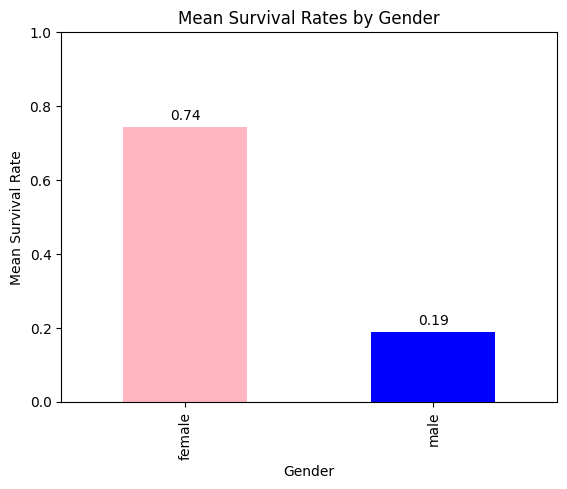

In [59]:
import matplotlib.pyplot as plt

mean_survival.plot(kind='bar', color=['lightpink', 'blue'])
plt.title("Mean Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)

for i, v in enumerate(mean_survival):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

In [62]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Titanic-Dataset.csv")


In [63]:
survival_by_port_gender=df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print(survival_by_port_gender)

Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


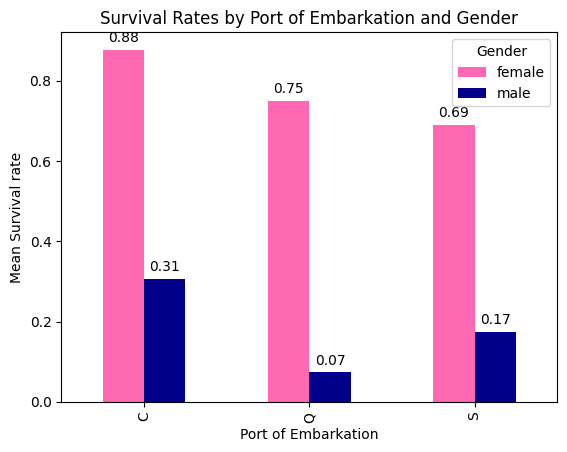

In [64]:
survival_by_port_gender.plot(kind='bar', color=['hotpink', 'darkblue'])
plt.title("Survival Rates by Port of Embarkation and Gender")
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival rate")

for i, port in enumerate(survival_by_port_gender.index):
  for j, sex in enumerate(survival_by_port_gender.columns):
    value = survival_by_port_gender.loc[port, sex]
    plt.text(i + j*0.25 - 0.125, value + 0.02, f"{value:.2f}", ha='center')

  plt.legend(title='Gender')

plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

In [65]:
df = df.dropna(subset=['Age', 'Pclass'])

In [66]:
df['AgeGroup']=pd.qcut(df['Age'], 5)
print(df[['Age', 'AgeGroup']].head())

    Age      AgeGroup
0  22.0  (19.0, 25.0]
1  38.0  (31.8, 41.0]
2  26.0  (25.0, 31.8]
3  35.0  (31.8, 41.0]
4  35.0  (31.8, 41.0]


In [68]:
survival_by_age_pclass=df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print(survival_by_age_pclass)

Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


/tmp/ipython-input-3119176614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_pclass=df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


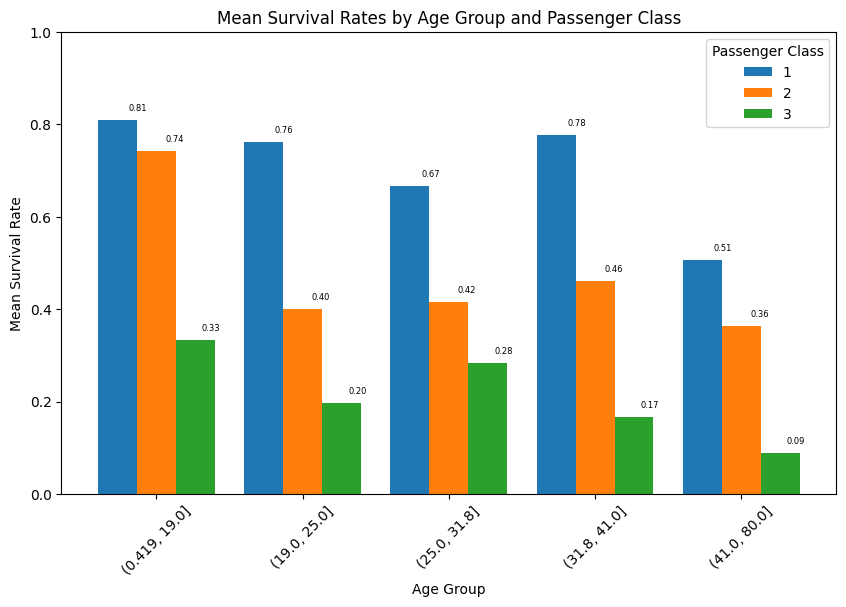

In [71]:
survival_by_age_pclass.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Mean Survival Rates by Age Group and Passenger Class")
plt.xlabel("Age Group")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, age_group in enumerate(survival_by_age_pclass.index):
  for j, pclass in enumerate(survival_by_age_pclass.columns):
    value = survival_by_age_pclass.loc[age_group, pclass]
    plt.text(i + j*0.25 - 0.125, value + 0.02, f"{value:.2f}", ha='center', fontsize=6)
plt.legend(title='Passenger Class')
plt.show()